## Steps for LOWESS:
1. Read and normalize the dataset
2. Generate W for every query point
3. No training is involved, directly make predictions from closed form solution (derived formula)
<br>$\theta = (X'WX)^{-1} X'WY$
4. Find the best value of hyperparameter tau $\tau$ (bandwidth parameter) using cross-validation



We use closed form solution as this algorithm is a non-parametric algorithm, ie, we cant learn an overall theta, but we learn a theta for every query point

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Loading data: Read and Normalize the dataset

In [39]:
dfx = pd.read_csv("../../Datasets/Linear Regression/weightedX.csv")
dfy = pd.read_csv("../../Datasets/Linear Regression/weightedY.csv")

In [40]:
X = dfx.values
Y = dfy.values

print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [41]:
plt.style.use("seaborn")

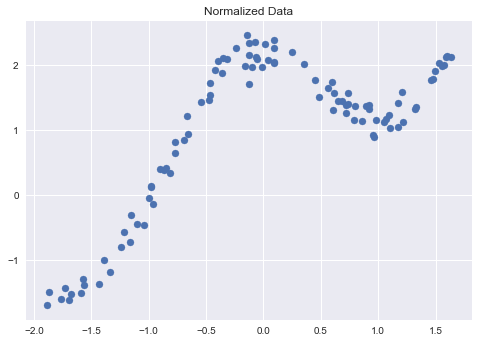

In [42]:
# Normalize

X = (X-X.mean())/X.std()
plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()

### 2. Finding out W (mxm diagonal matrix)

In [43]:
print(type(np.eye(5)))
print(type(np.mat(np.eye(5))))


# If A and B are matrices: A*B does matrix multiplication
# If A and B are arrays:   A*B does element wise multiplication

<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>


In [44]:
def getW(query_point, X, tau):
    
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        x = query_point
        W[i, i] = np.exp(np.dot((x - X[i]), (x - X[i]).T)/(-2*tau*tau))
    return W

In [45]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getW(-1, X, 1)    # As we increase tau, W becomes closer to identity matrix 
print(W.shape)
print(W)

# tau => How many points influence bandwidth, so with large tau, it becomes similar to linear regression, where 
# weight matrix is absent, ie, W becomes close to 1 (identity matrix) like linear regression

# e^-((...)/τ^2) so τ incr =>  e^-(1/∞) => =1, ie, linear regression

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


### 3. Making Predictions

In [46]:
def predict(X, Y, query_x, tau):
    M = X.shape[0]
    ones = np.ones((M,1))
    
    X_ = np.hstack((X, ones))
    qx = np.mat([query_x, 1])
    
    W = getW(qx, X_, tau)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
#     print(theta.shape, X_.shape, qx.shape)
    pred_value = np.dot(qx, theta)
    return theta, pred_value

In [47]:
theta, pred = predict(X, Y, 1, 1)
print(theta)
print(pred)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


### 4. Visualizing Predictions and Analyzing the Effect of Tau τ

In [88]:
def plotPredictions(tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []
    
    for qx in X_test:
        theta, pred = predict(X, Y, qx, tau)
        Y_test.append(pred[0][0])
        
    XO = np.array(X)
    YO = np.array(Y)
    Y_test = np.array(Y_test)
    plt.title("Tau: %.2f"%tau)
    plt.scatter(XO, YO)
    plt.scatter(X_test, Y_test, color='red')
    plt.show()

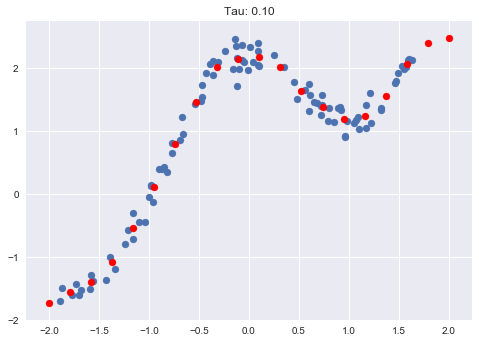

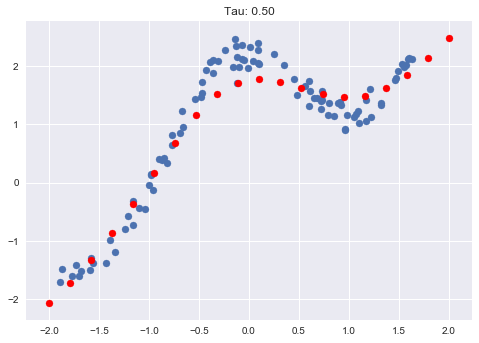

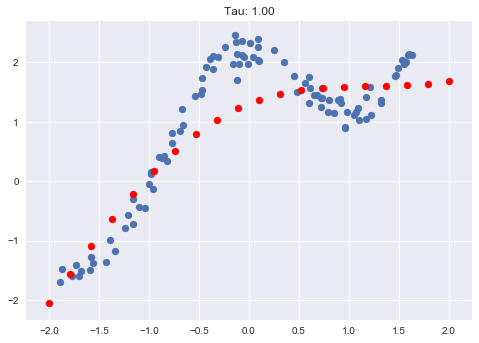

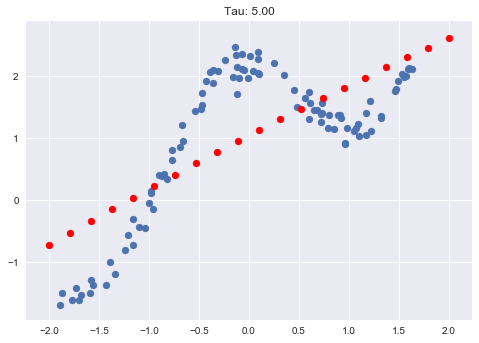

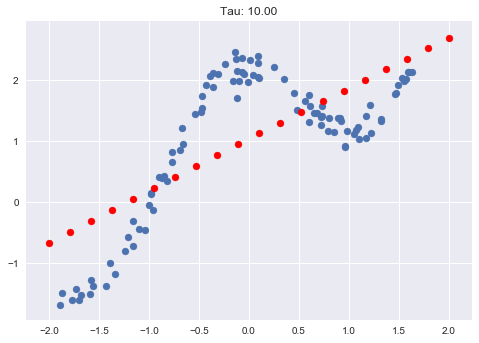

In [95]:
taus = [0.1, 0.5, 1, 5, 10]
for t in taus:
    plotPredictions(t)